# Plot the likelihood landscape of the 1D Ising Model

We use either the initial weight perturbation technique to plot the landscape or otherwise pinning technique for the same.

In [3]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import rbmPining
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies

In [ ]:
import dill
dill.dump_session('./data_bruckner/data/notebookData/10_likelihoodLandscape.db')

In [4]:
N = 100
beta = 1.
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs,Nstep=200) # N steps.

## Use pinning first:

In [ ]:
%%capture capt1
#Supress the output of the cell and save it to capt

RBM = []
results = []
likelihood = np.zeros(N)
for i in range(N):
#Train the model
    pinPos = [[0],[i]]
    RBM.append(rbmPining.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True))
    RBM[i].weights = 0.01*np.random.normal(loc=0,scale=0.1,size=(1,N))
    RBM[i].weights[pinPos] = 2
    results.append(RBM[i].fit(data,n_iter=100,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False,init='previous',PiningPos = pinPos))
    likelihood[i] = RBM[i].likelihood(data).mean()

In [ ]:
plt.plot(range(100),likelihood)

In [ ]:
%%capture capt3
#Supress the output of the cell and save it to capt

RBM3 = []
results3 = []
likelihood3 = np.zeros(N)
for i in range(N):
#Train the model
    pinPos = [[0],[i]]
    RBM3.append(rbmPining.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True))
    RBM3[i].weights = 0.01*np.random.normal(loc=0,scale=0.1,size=(1,N))
    RBM3[i].weights[pinPos] = 2
    results3.append(RBM3[i].fit(data,n_iter=100,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False,init='previous',PiningPos = pinPos))
    likelihood3[i] = RBM3[i].likelihood(data).mean()

In [ ]:
plt.plot(range(100),likelihood3)

## Now use biasing initial conditions:

### Thin and tall:

In [ ]:
%%capture capt2
#Supress the output of the cell and save it to capt

from scipy.stats import norm

RBM2 = []
results2 = []
likelihood2 = np.zeros(N)
for i in range(N):
    
    RBM2.append(rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True))
    RBM2[i].weights = 0.01*np.random.normal(loc=0,scale=0.1,size=(1,N))
    RBM2[i].weights += 20*norm.pdf(x=np.linspace(0,99,100),loc=i,scale=1)
    results2.append(RBM2[i].fit(data,n_iter=100,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False,init='previous'))
    likelihood2[i] = RBM2[i].likelihood(data).mean()

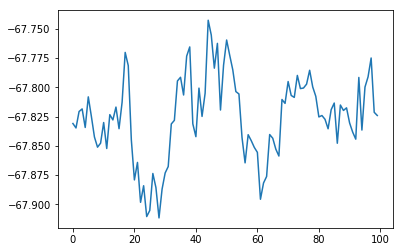

In [10]:
plt.plot(range(100),likelihood2)

### Thick and Tall:

In [ ]:
%%capture capt4
#Supress the output of the cell and save it to capt

RBM4 = []
results4 = []
likelihood4 = np.zeros(N)
for i in range(N):
    
    RBM4.append(rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True))
    RBM4[i].weights = 0.01*np.random.normal(loc=0,scale=0.1,size=(1,N))
    RBM4[i].weights += 500*norm.pdf(x=np.linspace(0,99,100),loc=70,scale=10)
    results4.append(RBM4[i].fit(data,n_iter=100,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False,init='previous'))
    likelihood4 = RBM4[i].likelihood(data).mean()

In [ ]:
plt.plot(range(100),likelihood4)